60000 train samples
10000 test samples
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_56 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.35599619240760805
Test accuracy: 0.8730000257492065
Single layer:


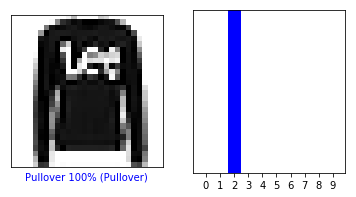

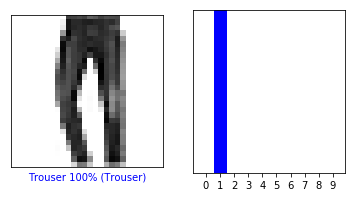

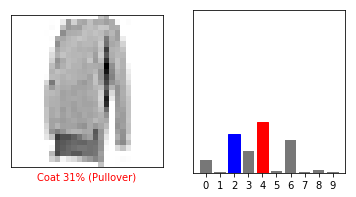

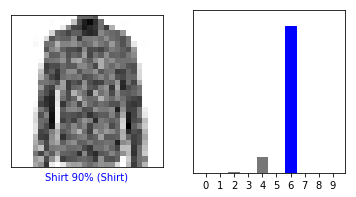

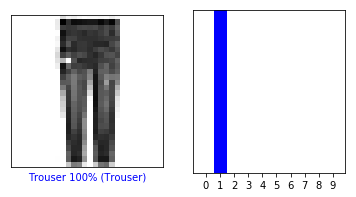

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_58 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_59 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_60 (Dense)             (None, 10)                5130      
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________


KeyboardInterrupt: 

In [18]:
import keras
import pandas as pd
from keras.datasets import fashion_mnist 
from keras.models import Sequential 
from keras.layers import Dense, Dropout 
from keras.optimizers import RMSprop 
from keras.optimizers import SGD
import numpy as np


import matplotlib.pyplot as plt 
%matplotlib inline

#print (y_train[1000])

'''
fig= plt.figure() 
plt.imshow(x_train[1000], cmap='gray') 
print (y_train[4000])
fig= plt.figure() 

plt.imshow(x_train[4000], cmap='gray')
fig= plt.figure(figsize=(20,10)) 
for i in range (1,41):
    ax1 = fig.add_subplot(5,8,i) 
    plt.xticks([], [])
    plt.yticks([], []) 
    ax1.imshow(x_train[i], cmap='gray')'''


num_classes = 10

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# the data, shuffled and split between train and test sets 
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


x_train = x_train.reshape(60000, 784) 
x_test = x_test.reshape(10000, 784) 
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples') 
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
##y_train = keras.utils.to_categorical(y_train, num_classes) 
##y_test = keras.utils.to_categorical(y_test, num_classes)

def train_model(model, batch_size, epochs):
    history = model.fit(x_train, y_train,
        batch_size=batch_size, epochs=epochs,
        verbose=0, validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0) 
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    return model.predict(x_test)


def build_model(number_of_neurons,number_of_layers,batch_size, epochs,opt):
    model = Sequential()
    model.add(Dense(number_of_neurons, activation='relu', input_shape=(784,)))
    
    for i in range(number_of_layers-1):
        model.add(Dense(number_of_neurons, activation='relu'))
    
    model.add(Dense(num_classes, activation='softmax'))
    model.summary()
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy']) 
    return train_model(model,batch_size, epochs)

def build_model_with_dropout(number_of_neurons,number_of_layers,batch_size, epochs,opt):
    model = Sequential()
    model.add(Dense(number_of_neurons, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    
    for i in range(number_of_layers-1):
        model.add(Dense(number_of_neurons, activation='relu'))
        model.add(Dropout(0.2))
    
    model.add(Dense(num_classes, activation='softmax'))
    model.summary()
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy']) 
    return train_model(model,batch_size, epochs)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

def plot_many(pred, ind):
    for i in ind:
        plt.figure(figsize=(6,3))
        plt.subplot(1,2,1)
        plot_image(i, pred[i], y_test, x_test.reshape(10000, 28,28) )
        plt.subplot(1,2,2)
        plot_value_array(i, pred[i], y_test)
        plt.show()



def main():
    
    test_indices = [1,5,66,101,200]
    # Single layer
    predictions_single = build_model(512,1,128,5,'RMSprop')
    
    print("Single layer:")
    plot_many(predictions_single, test_indices)
    
    prediction_multi_no_drop_out = build_model(512,3,128,5,'RMSprop') # three layers
    
    print("Three layers, no dropout:")
    plot_many(prediction_multi_no_drop_out, test_indices)
    
    
    prediction_multi_drop_out = build_model_with_dropout(512,3,128,5,'RMSprop')
    
    print("Three layers, dropout:")
    plot_many(prediction_multi_drop_out,test_indices)
   
        


if __name__ == "__main__":
    main()

